# use regex to clean data

https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies

In [562]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%config InlineBackend.figure_format='retina'
print(f'pandas version: {pd.__version__}')

pandas version: 2.2.1


In [563]:
pd.set_option('display.max_row',100)

In [564]:
from datetime import datetime
str(datetime.now())

'2024-05-24 22:05:25.719800'

## Import Dataset

In [565]:
dfs=pd.read_html('https://en.wikipedia.org/wiki/List_of_unicorn_startup_companies',
                 match='Valuation', header=0)
len(dfs)

2

In [566]:
df=dfs[0]
df.head()

,Company,Valuation (US$ billions),Valuation date,Industry,Country/ countries,Founder(s)
0,SpaceX,175,December 2023 [20],Aerospace,United States,Elon Musk
1,OpenAI,80-90,September 2023[21],Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
2,Binance,80-90,September 2021[13],Cryptocurrency,United Arab Emirates,Changpeng Zhao
3,Shein,66,May 2023 [13],E-commerce,China,Chris Xu
4,Stripe,50,March 2023 [13],Financial services,United States and Ireland,Patrick and John Collison


In [567]:
# df2=dfs[1]
# df2

In [568]:
df.shape

(673, 6)

In [569]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Company                   673 non-null    object
 1   Valuation (US$ billions)  673 non-null    object
 2   Valuation date            673 non-null    object
 3   Industry                  609 non-null    object
 4   Country/ countries        673 non-null    object
 5   Founder(s)                160 non-null    object
dtypes: object(6)
memory usage: 31.7+ KB


In [570]:
df.columns

Index(['Company', 'Valuation (US$ billions)', 'Valuation date', 'Industry',
       'Country/ countries', 'Founder(s)'],
      dtype='object')

In [571]:
# df.rename(columns={'Calories':'cal', 'Carbohydrates (g)':'carb'}, inplace=True)
df = df.rename(columns = {'Valuation (US$ billions)': 'Valuation',
                        'Valuation date': 'ValuationDate',
                        'Country/ countries': 'Country',
                         'Founder(s)': 'Founder',
                        })

In [572]:
df

,Company,Valuation,ValuationDate,Industry,Country,Founder
0,SpaceX,175,December 2023 [20],Aerospace,United States,Elon Musk
1,OpenAI,80-90,September 2023[21],Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
2,Binance,80-90,September 2021[13],Cryptocurrency,United Arab Emirates,Changpeng Zhao
3,Shein,66,May 2023 [13],E-commerce,China,Chris Xu
4,Stripe,50,March 2023 [13],Financial services,United States and Ireland,Patrick and John Collison
...,...,...,...,...,...,...
668,Voi,1+,April 2022[69],NaN,Sweden,NaN
669,Neo Financial,1,May 2022[592],Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
670,Physics Wallah,1.1,June 2022[593],Educational technology,India,Alakh Pandey
671,Stytch,1,November 2021[594],Cybersecurity,United States,"Reed McGinley-Stempel, Julianna Lamb"


In [573]:
# df.columns = df.columns.str.replace(r' ','_')
# df

## Data Cleaning

In [574]:
df[df['ValuationDate'].str.contains(r'\[')]

,Company,Valuation,ValuationDate,Industry,Country,Founder
0,SpaceX,175,December 2023 [20],Aerospace,United States,Elon Musk
1,OpenAI,80-90,September 2023[21],Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
2,Binance,80-90,September 2021[13],Cryptocurrency,United Arab Emirates,Changpeng Zhao
3,Shein,66,May 2023 [13],E-commerce,China,Chris Xu
4,Stripe,50,March 2023 [13],Financial services,United States and Ireland,Patrick and John Collison
...,...,...,...,...,...,...
668,Voi,1+,April 2022[69],NaN,Sweden,NaN
669,Neo Financial,1,May 2022[592],Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
670,Physics Wallah,1.1,June 2022[593],Educational technology,India,Alakh Pandey
671,Stytch,1,November 2021[594],Cybersecurity,United States,"Reed McGinley-Stempel, Julianna Lamb"


In [575]:
df['ValuationDate'].str.replace(r'(\[.*\]|<)',' ', regex=True)

0      December 2023  
1      September 2023 
2      September 2021 
3           May 2023  
4         March 2023  
            ...       
668        April 2022 
669          May 2022 
670         June 2022 
671     November 2021 
672     December 2022 
Name: ValuationDate, Length: 673, dtype: object

In [576]:
df['ValuationDate'] = df['ValuationDate'].str.replace(r'(\[.*\]|<)',' ', regex=True)
df['Country'] = df['Country'].str.replace(r'\[.*\]',' ', regex=True)
df['Country'] = df['Country'].str.replace(r'( / |/ )',' / ', regex=True)   #for case Senegel/ USA
df

,Company,Valuation,ValuationDate,Industry,Country,Founder
0,SpaceX,175,December 2023,Aerospace,United States,Elon Musk
1,OpenAI,80-90,September 2023,Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
2,Binance,80-90,September 2021,Cryptocurrency,United Arab Emirates,Changpeng Zhao
3,Shein,66,May 2023,E-commerce,China,Chris Xu
4,Stripe,50,March 2023,Financial services,United States and Ireland,Patrick and John Collison
...,...,...,...,...,...,...
668,Voi,1+,April 2022,NaN,Sweden,NaN
669,Neo Financial,1,May 2022,Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
670,Physics Wallah,1.1,June 2022,Educational technology,India,Alakh Pandey
671,Stytch,1,November 2021,Cybersecurity,United States,"Reed McGinley-Stempel, Julianna Lamb"


In [577]:
# remove whitespaces (preventive)
# df['Valuation date'] = df['Valuation date'].str.strip()
# df['Valuation date'] = df['Valuation date'].str.lstrip()
# df['Valuation date'] = df['Valuation date'].str.rstrip()
# df

In [578]:
df['ValuationDate'] = pd.to_datetime(df['ValuationDate'])
df

C:\Users\khala\AppData\Local\Temp\ipykernel_14608\2659286394.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['ValuationDate'] = pd.to_datetime(df['ValuationDate'])


,Company,Valuation,ValuationDate,Industry,Country,Founder
0,SpaceX,175,2023-12-01,Aerospace,United States,Elon Musk
1,OpenAI,80-90,2023-09-01,Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
2,Binance,80-90,2021-09-01,Cryptocurrency,United Arab Emirates,Changpeng Zhao
3,Shein,66,2023-05-01,E-commerce,China,Chris Xu
4,Stripe,50,2023-03-01,Financial services,United States and Ireland,Patrick and John Collison
...,...,...,...,...,...,...
668,Voi,1+,2022-04-01,NaN,Sweden,NaN
669,Neo Financial,1,2022-05-01,Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
670,Physics Wallah,1.1,2022-06-01,Educational technology,India,Alakh Pandey
671,Stytch,1,2021-11-01,Cybersecurity,United States,"Reed McGinley-Stempel, Julianna Lamb"


-  ignore waringing because certain rows include date

In [579]:
# remove whitespaces (preventive)
df['Country'] = df['Country'].str.strip()
df['Country'] = df['Country'].str.lstrip()
df['Country'] = df['Country'].str.rstrip()

In [580]:
df_bycountry = df.groupby(['Country']).count()
df_bycountry

,Company,Valuation,ValuationDate,Industry,Founder
Country,,,,,
Argentina,2,2,2,2,0
Argentina / United States,1,1,1,1,1
Armenia / United States,1,1,1,1,1
Australia,5,5,5,5,2
Australia / Hong Kong,1,1,1,1,0
Austria,2,2,2,2,0
Bangladesh,2,2,2,2,2
Belgium,3,3,3,3,1
Brazil,10,10,10,10,0


In [581]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 673 entries, 0 to 672
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Company        673 non-null    object        
 1   Valuation      673 non-null    object        
 2   ValuationDate  673 non-null    datetime64[ns]
 3   Industry       609 non-null    object        
 4   Country        673 non-null    object        
 5   Founder        160 non-null    object        
dtypes: datetime64[ns](1), object(5)
memory usage: 31.7+ KB


In [582]:
df.Valuation.describe()

count     673
unique    154
top        1+
freq      169
Name: Valuation, dtype: object

In [583]:
pd.set_option('display.max_row',20)

In [584]:
df['Valuation'] = df.Valuation.str.replace('+','')
df

,Company,Valuation,ValuationDate,Industry,Country,Founder
0,SpaceX,175,2023-12-01,Aerospace,United States,Elon Musk
1,OpenAI,80-90,2023-09-01,Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
2,Binance,80-90,2021-09-01,Cryptocurrency,United Arab Emirates,Changpeng Zhao
3,Shein,66,2023-05-01,E-commerce,China,Chris Xu
4,Stripe,50,2023-03-01,Financial services,United States and Ireland,Patrick and John Collison
...,...,...,...,...,...,...
668,Voi,1,2022-04-01,NaN,Sweden,NaN
669,Neo Financial,1,2022-05-01,Financial technology,Canada,"Andrew Chau, Jeff Adamson, Kris Read"
670,Physics Wallah,1.1,2022-06-01,Educational technology,India,Alakh Pandey
671,Stytch,1,2021-11-01,Cybersecurity,United States,"Reed McGinley-Stempel, Julianna Lamb"


In [585]:
df[df.Valuation.str.contains('-')]

,Company,Valuation,ValuationDate,Industry,Country,Founder
1,OpenAI,80-90,2023-09-01,Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
2,Binance,80-90,2021-09-01,Cryptocurrency,United Arab Emirates,Changpeng Zhao
6,Anthropic,20-30,2023-10-01,Artificial Intelligence,United States,Dario Amodei


In [586]:
df['Valuation'] = df.Valuation.str.replace('80-90','85')
df['Valuation'] = df.Valuation.str.replace('20-30','25')
# df['Valuation'] = df.Valuation.astype('float32')

In [587]:
df[df.Valuation.str.contains(r'[a-z]')]

,Company,Valuation,ValuationDate,Industry,Country,Founder
14,Nature's Fynd,Undisclosed,2021-07-01,Consumer packaged goods,United States,"Thomas Jonas, Mark Kozubal, Yuval Avniel, Rich..."


In [590]:
df['Valuation'] = df.Valuation.str.replace('Undisclosed','1')

In [591]:
df[df.Valuation.str.contains(r'[a-z]')]

,Company,Valuation,ValuationDate,Industry,Country,Founder


In [592]:
df['Valuation'] = df.Valuation.astype('float32')

## EDA

In [593]:
df[df.Country.str.contains('United States')]

,Company,Valuation,ValuationDate,Industry,Country,Founder
0,SpaceX,175.0,2023-12-01,Aerospace,United States,Elon Musk
1,OpenAI,85.0,2023-09-01,Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
4,Stripe,50.0,2023-03-01,Financial services,United States and Ireland,Patrick and John Collison
5,Databricks,43.0,2023-09-01,Software,United States,Ali Ghodsi
6,Anthropic,25.0,2023-10-01,Artificial Intelligence,United States,Dario Amodei
...,...,...,...,...,...,...
641,VTS,1.0,2019-05-01,NaN,United States,NaN
651,Zenoti,1.0,2020-12-01,Software company,India / United States,NaN
657,ReliaQuest,1.0,2021-12-01,Cybersecurity,United States,Brian Murphy
664,BlueVoyant,1.0,2022-02-01,Cybersecurity,United States,"Jim Rosenthal, Chris Meissner, Jim Thompson, a..."


In [612]:
df[df.Country.str.contains('United States')].nlargest(10,columns='Valuation')

,Company,Valuation,ValuationDate,Industry,Country,Founder
0,SpaceX,175.0,2023-12-01,Aerospace,United States,Elon Musk
1,OpenAI,85.0,2023-09-01,Artificial intelligence,United States,"Sam Altman, Greg Brockman, Ilya Sutskever"
4,Stripe,50.0,2023-03-01,Financial services,United States and Ireland,Patrick and John Collison
5,Databricks,43.0,2023-09-01,Software,United States,Ali Ghodsi
7,Epic Games,31.5,2022-06-01,Video games,United States,Tim Sweeney
9,Fanatics,27.0,2022-06-01,E-commerce,United States,"Alan Trager, Mitch Trager, Michael Rubin[24]"
6,Anthropic,25.0,2023-10-01,Artificial Intelligence,United States,Dario Amodei
10,Chime,25.0,2022-06-01,Financial services,United States,Chris Britt and Ryan King
13,Miro,17.5,2022-01-01,Software,United States,Andrey Khusid
17,Discord,15.0,2021-09-01,Software,United States,"Jason Citron, Stanislav Vishnevsky"


In [594]:
df[df.Country.str.contains('United States')].groupby('Country')[['Industry']].count()

,Industry
Country,
Argentina / United States,1
Armenia / United States,1
Brazil / United States,1
Canada / United States,1
China / United States,2
Estonia / United States,1
France / United States,2
India / United States,10
Israel / United States,13


In [596]:
df[df.Country.str.contains('United States')].groupby('Country')[['Industry']].count().sum()

Industry    250
dtype: int64

In [616]:
df[df.Country.str.contains('China')].groupby('Country')[['Industry']].count()

,Industry
Country,
China,47
China / Hong Kong,2
China / United States,2
Hong Kong / China,1


In [620]:
df[df.Country.str.contains('China / United States')]

,Company,Valuation,ValuationDate,Industry,Country,Founder
102,Pony.ai,5.3,2020-11-01,Artificial intelligence,China / United States,"James Peng, Tiancheng Lou"
118,Royole,5.0,2018-08-01,Flexible electronics,China / United States,NaN


In [614]:
df[df.Country.str.contains('China')].nlargest(10,columns='Valuation')

,Company,Valuation,ValuationDate,Industry,Country,Founder
3,Shein,66.0,2023-05-01,E-commerce,China,Chris Xu
16,Yuanfudao,15.5,2020-10-01,Educational technology,China,Yong Li
18,DJI,15.0,2016-09-01,Technology,China,Frank Wang (Wang Tao)
20,Xiaohongshu,14.0,2023-09-01,E-commerce,China,"Miranda Qu Fang, Charlwin Mao Wenchao"
27,Bitmain,12.0,2018-06-01,Cryptocurrency,China,Jihan Wu
29,SenseTime,12.0,2021-01-01,Artificial intelligence,China / Hong Kong,Tang Xiao'ouXu Li
36,ZongMu Technology,11.0,2021-06-01,Self-driving cars,China,Tang Rui[50]
41,Chehaoduo,10.0,2021-07-01,Marketplace,China,NaN
46,Lalamove,10.0,2021-01-01,Supply chain management,Hong Kong / China,NaN
55,HeyTea,9.3,2021-07-01,Retail,China,NaN


In [598]:
df[df.Country.str.contains('China')].groupby('Country')[['Industry']].count().sum()

Industry    52
dtype: int64

In [600]:
df.columns

Index(['Company', 'Valuation', 'ValuationDate', 'Industry', 'Country',
       'Founder'],
      dtype='object')

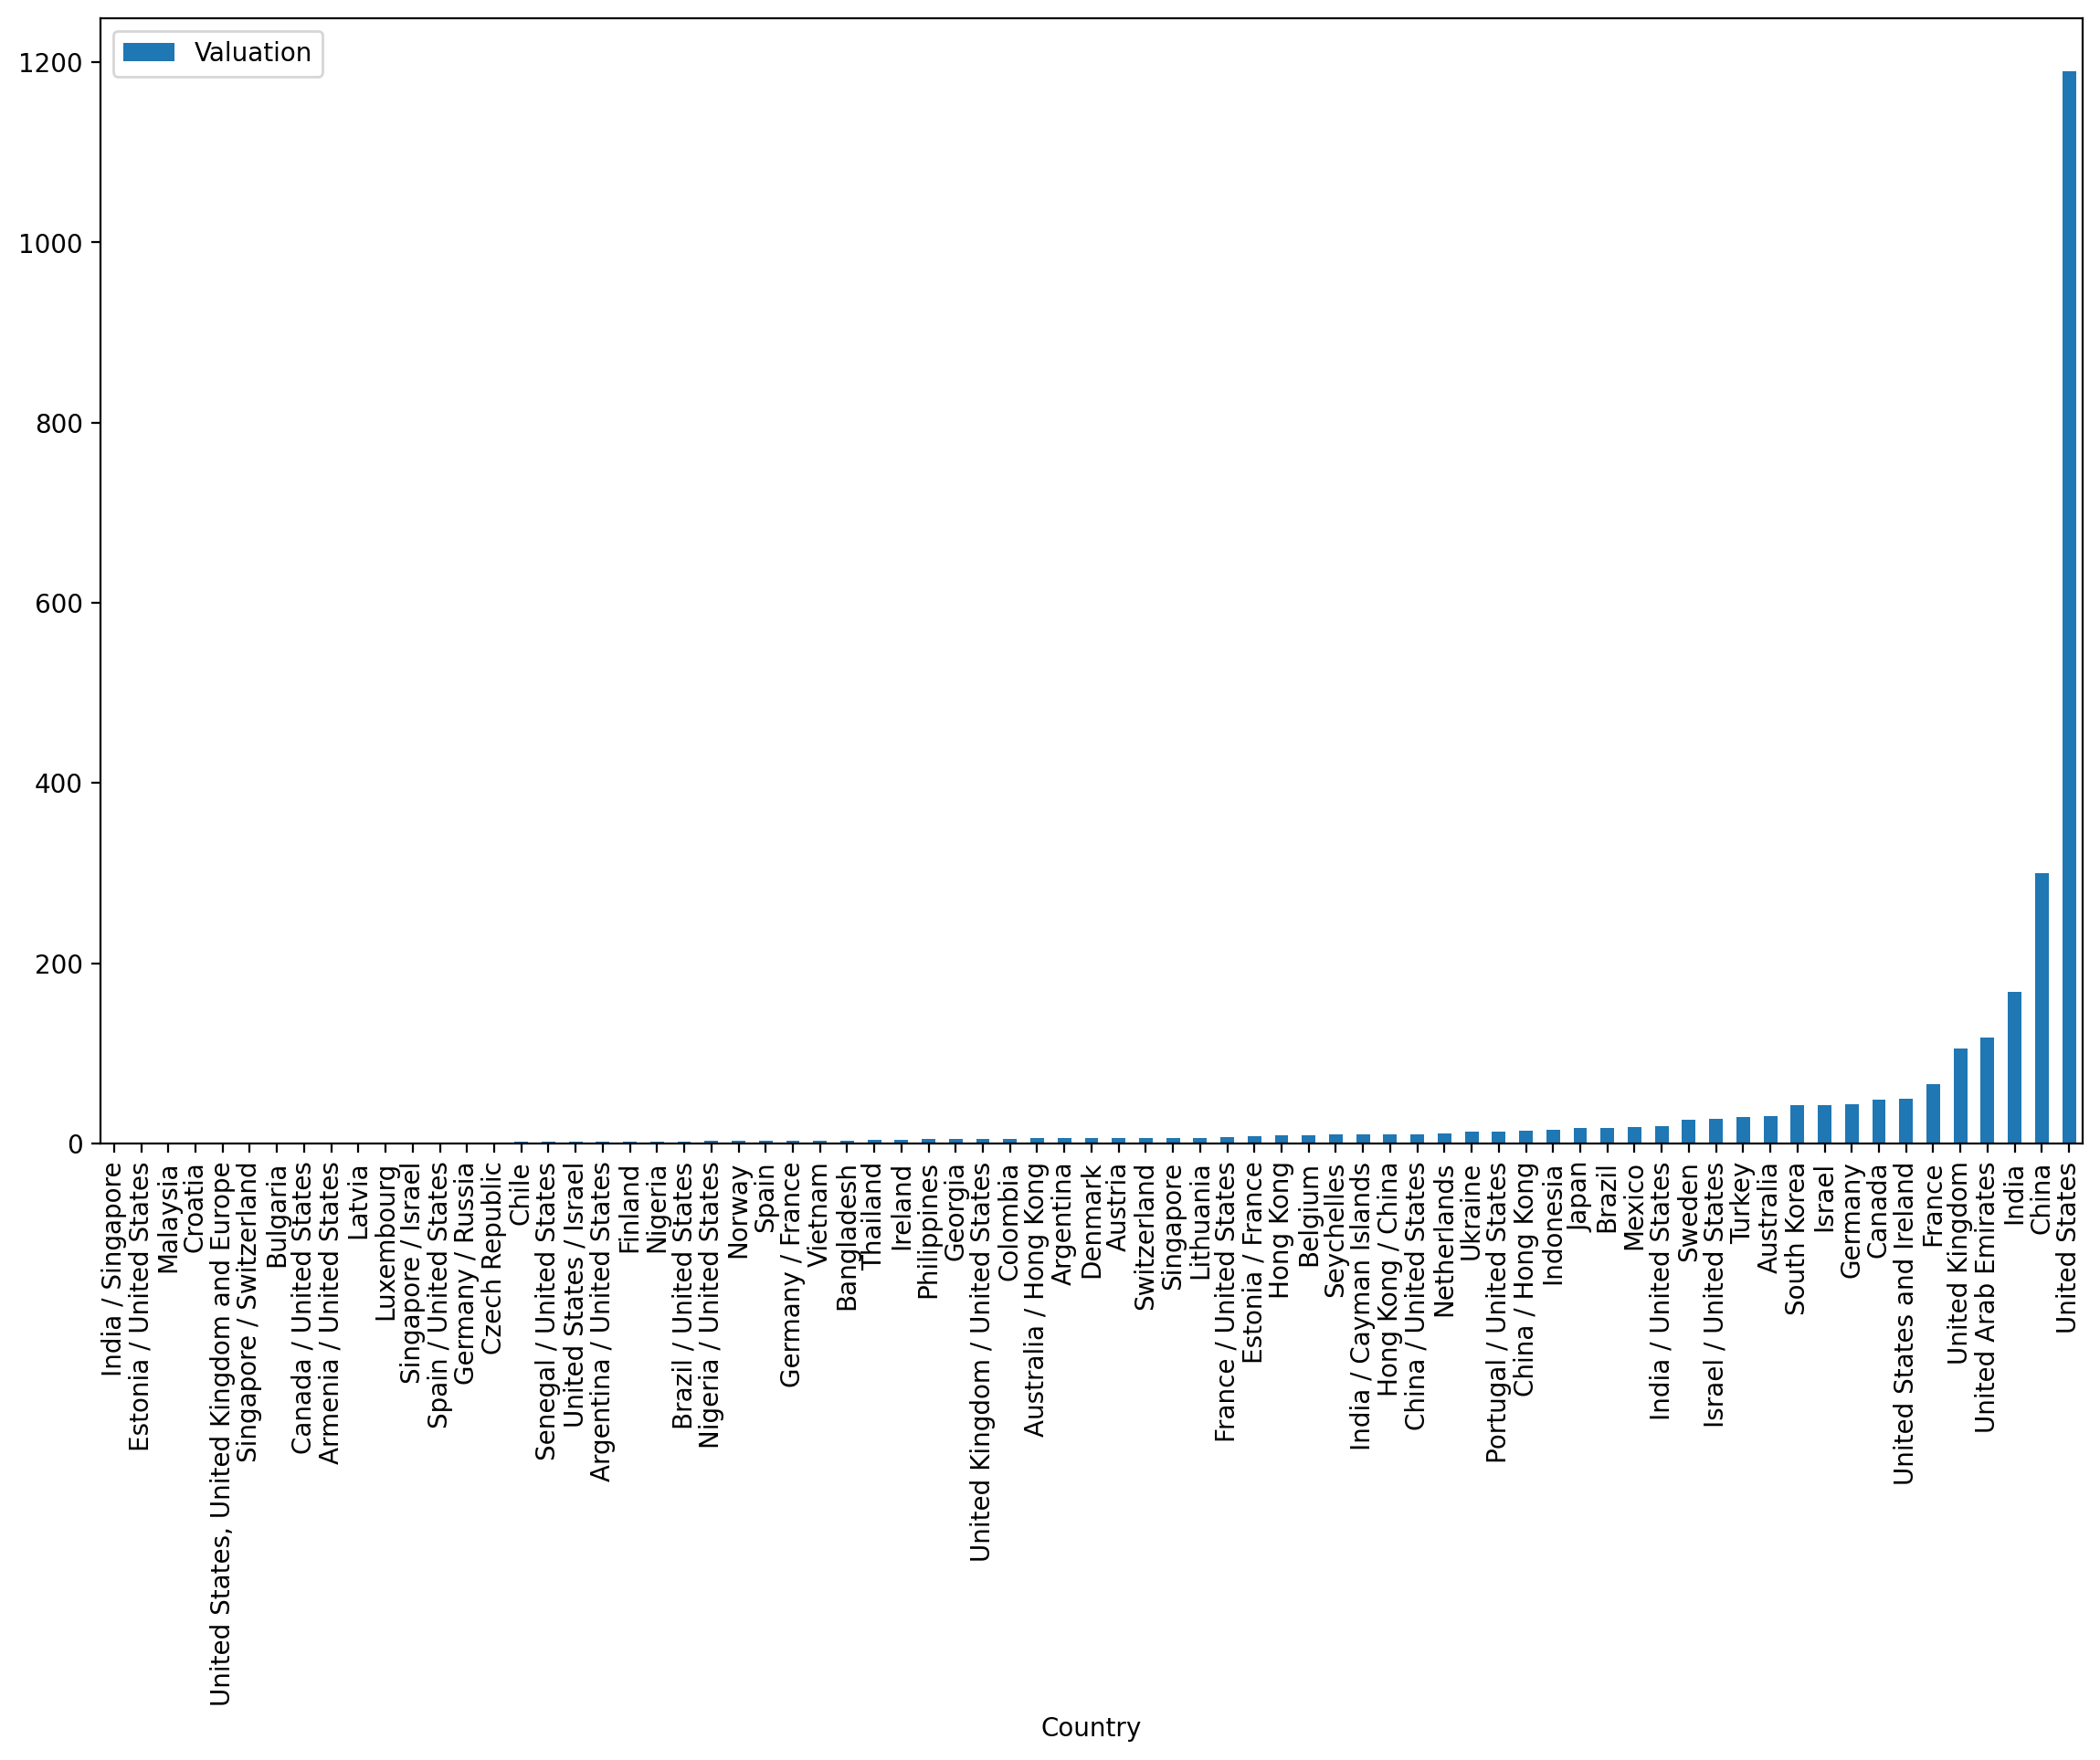

In [615]:
df.groupby('Country')[['Valuation']].sum().sort_values('Valuation').plot(kind='bar',rot=90, figsize=(14,8));